# Machine Learning Prediction Of Employee Turnover

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('employee_details.csv')
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

#### Checking if Nan Values are Present

In [3]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [4]:
df.duplicated(keep="first").sum()


3008

#### Dropping Duplicates if Present

In [5]:
df.drop_duplicates(inplace=True)

### Exploring the Dataset

### Monthly Hours

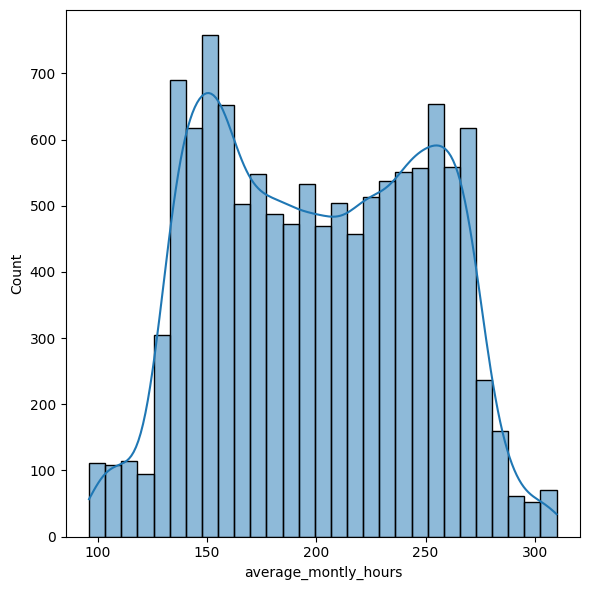

In [6]:
plt.figure(figsize=(6, 6))
sns.histplot(data = df, x = df["average_montly_hours"], kde=True)
plt.tight_layout()
plt.show()

### Number Of Projects

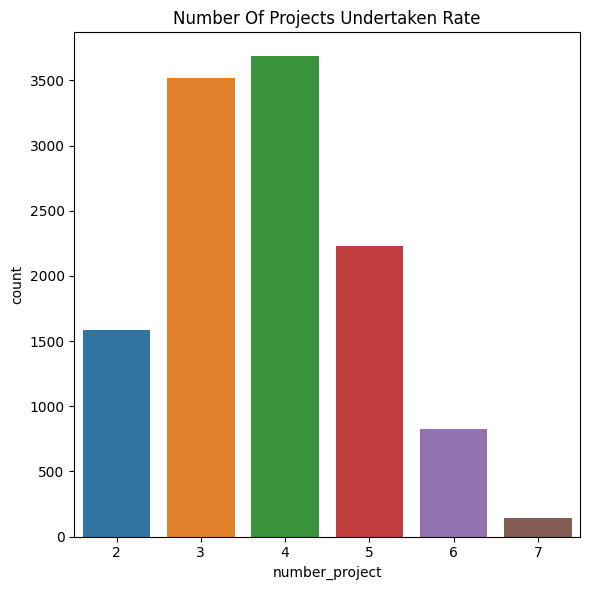

In [7]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="number_project")
plt.title("Number Of Projects Undertaken Rate")
plt.tight_layout()
plt.show()

### Promotion Made In The Last 5 Years

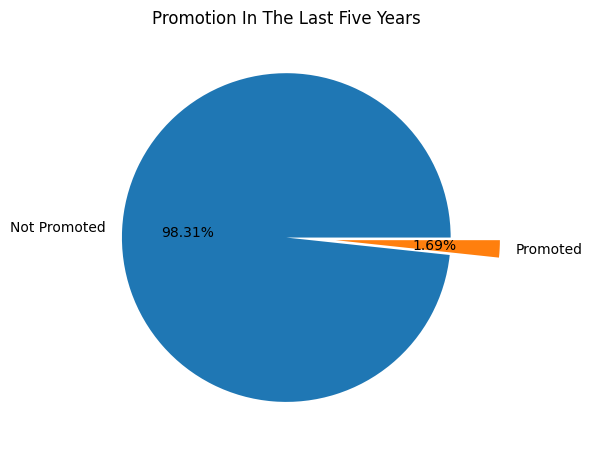

In [8]:
labels = df["promotion_last_5years"].value_counts().index.tolist()
labels = ["Promoted" if i == 1 else "Not Promoted" for i in labels]
plt.figure(figsize=(6, 6))
plt.pie(x = df["promotion_last_5years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years")
plt.tight_layout()
plt.show()

### Work Accidents

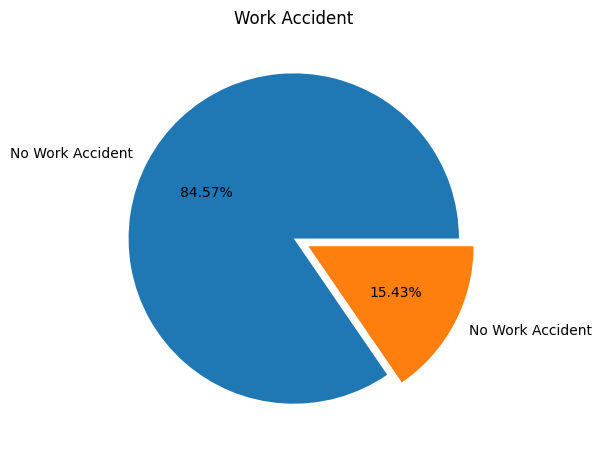

In [9]:
df["Work_accident"].value_counts()
labels = ["Work Accident" if i == 1 else "No Work Accident" for i in labels]
plt.figure(figsize=(6, 6))
plt.pie(x = df["Work_accident"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.1])
plt.title("Work Accident")
plt.tight_layout()
plt.show()

### Time Spent In Company

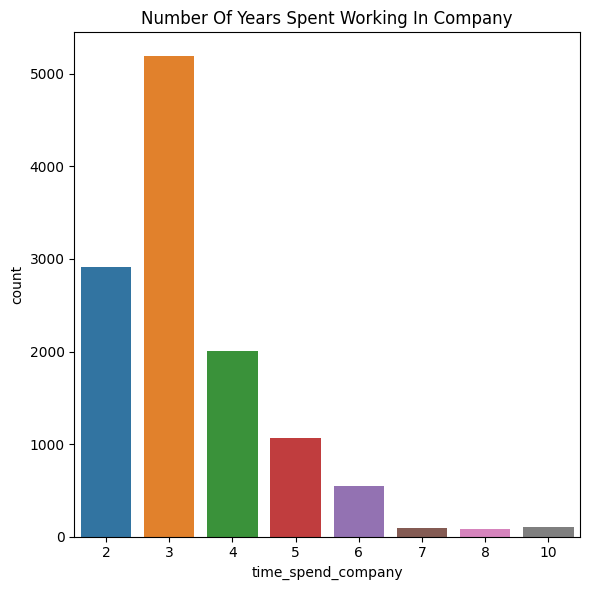

In [10]:
labels = df["time_spend_company"].value_counts().index.tolist()
plt.figure(figsize=(6, 6))
sns.countplot(x = "time_spend_company", data=df)
plt.title("Number Of Years Spent Working In Company")
plt.tight_layout()
plt.show()

In [11]:
df["time_spend_company"].mean()

3.3648569760653824

### Department Comparison

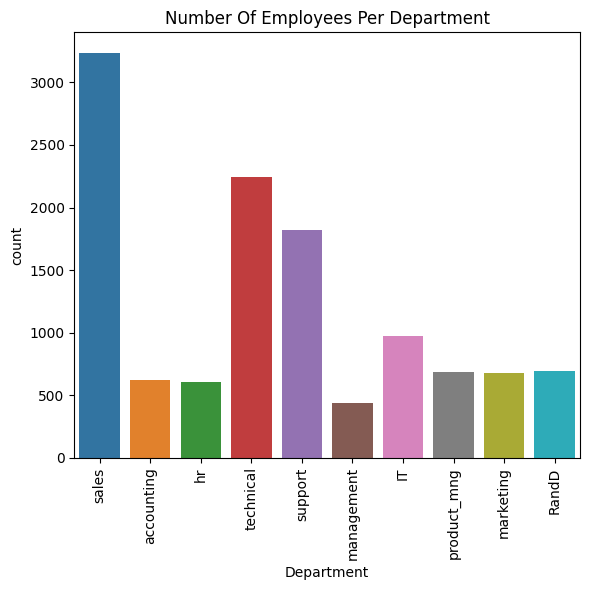

In [12]:
plt.figure(figsize=(6, 6))
sns.countplot(x = "Department", data=df)
plt.title("Number Of Employees Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Salary

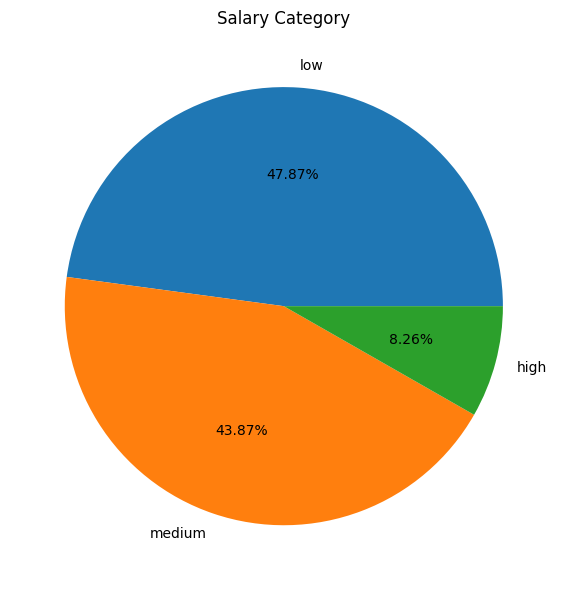

In [13]:
labels = df["salary"].value_counts().index.tolist()
plt.figure(figsize=(6, 6))
plt.pie(x = df["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Category")
plt.tight_layout()
plt.show()

## Data Preprocessing

### Categorical Encoding

In [14]:
categorical_cols = ["Department", "salary"]
encoded_cols = pd.get_dummies(df[categorical_cols], prefix="cat")

In [15]:
encoded_cols
df = df.join(encoded_cols)

In [16]:
df.drop(["Department", "salary"], inplace=True, axis="columns")

### Split Data Into Train and Test

In [17]:
X = df.drop("left", axis=1)
y = df["left"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Train Model

### Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logReg = LogisticRegression(max_iter=2000)

In [20]:
logReg = LogisticRegression(max_iter=2000)
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [21]:
logReg_predictions = logReg.predict(X_test)
accuracy_score(y_test, logReg_predictions)

0.8303459774906211

### Logistic Regression Classification Report

In [22]:
print(classification_report(y_test, logReg_predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1988
           1       0.51      0.19      0.27       411

    accuracy                           0.83      2399
   macro avg       0.68      0.58      0.59      2399
weighted avg       0.79      0.83      0.80      2399



### Logistic Regression Confusion Matrix

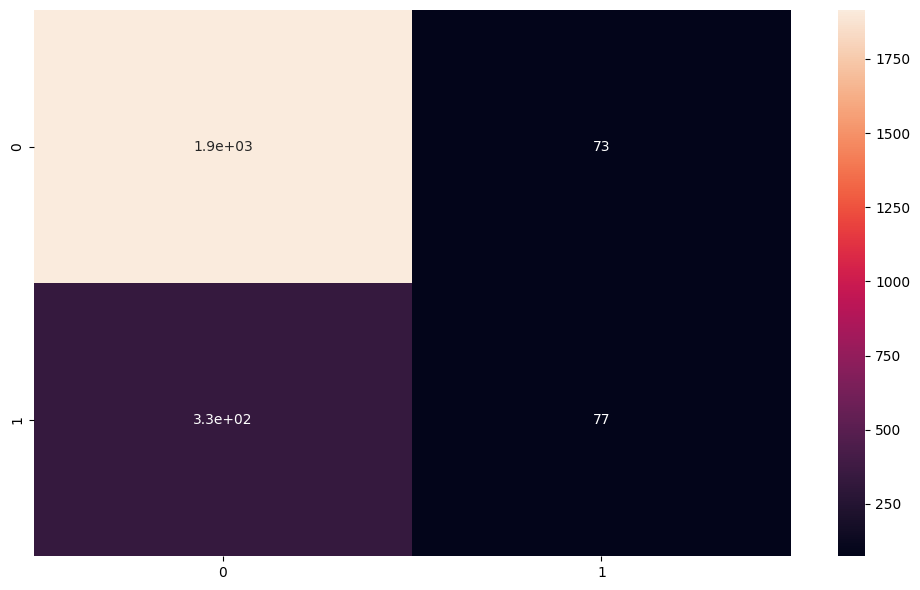

In [23]:
cm = confusion_matrix(y_test, logReg_predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
ranForest = RandomForestClassifier(n_estimators=100)
ranForest.fit(X_train, y_train)
ranForest_predictions = ranForest.predict(X_test)

In [25]:
accuracy_score(y_test, ranForest_predictions)

0.9833263859941642

### Random Forest Classification Report

In [26]:
print(classification_report(y_test, ranForest_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1988
           1       0.99      0.91      0.95       411

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



### Random Forest Confusion Matrix

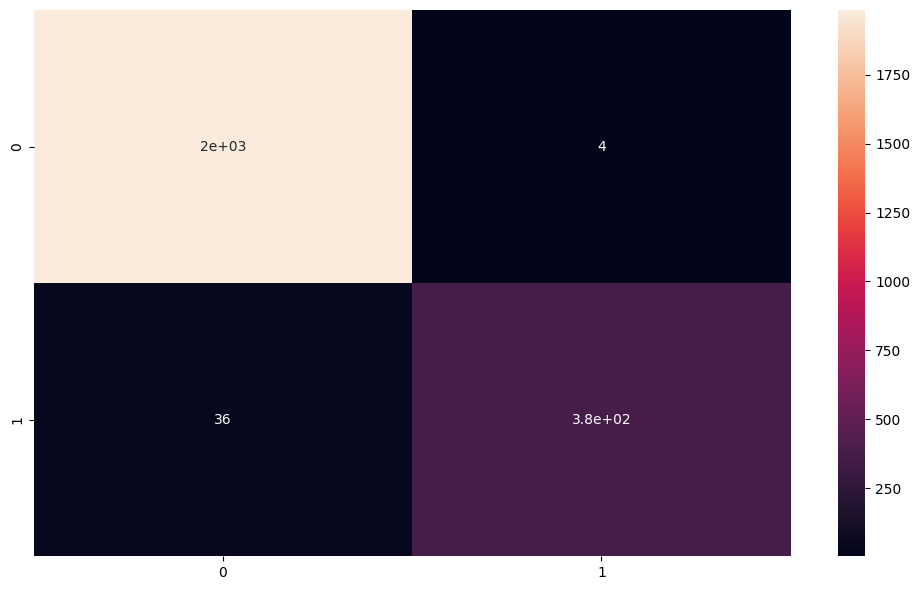

In [27]:
cm = confusion_matrix(y_test, ranForest_predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
dt= DecisionTreeClassifier(random_state=42)  
dt.fit(X_train,y_train)
pred=dt.predict(X_test)

In [29]:
print(accuracy_score(y_test,pred))

0.9666527719883284


In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.90      0.91      0.90       401

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399



## Support Vector Machine

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [32]:
svm=SVC(kernel='rbf') 
svm.fit(X_train,y_train)
pred=svm.predict(X_test)

In [33]:
print(accuracy_score(y_test,pred))

0.8328470195914964


# GUI

In [39]:
import tkinter as tk
from tkinter import ttk, simpledialog
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

class InputDialog(simpledialog.Dialog):
    def _init_(self, parent, title, options):
        self.options = options
        super()._init_(parent, title)

    def body(self, master):
        tk.Label(master, text="Select an option:").pack(padx=10, pady=5)

        self.var = tk.StringVar(value=self.options[0])
        for option in self.options:
            ttk.Radiobutton(master, text=option, variable=self.var, value=option).pack(anchor="w", padx=10)

    def apply(self):
        self.result = self.var.get()

class InputDialog2(simpledialog.Dialog):
    def _init_(self, parent, title, prompts):
        self.prompts = prompts
        self.values = {}
        super()._init_(parent, title)

    def body(self, master):
        for prompt in self.prompts:
            tk.Label(master, text=prompt).pack(padx=10, pady=5)
            entry = tk.Entry(master)
            entry.pack(pady=5)
            self.values[prompt] = entry

    def apply(self):
        self.result = {prompt: float(entry.get()) for prompt, entry in self.values.items()}

class EmployeeTurnoverGUI:
    def __init__(self, master, df):
        self.master = master
        self.master.title("Employee Turnover Prediction")
        self.master.geometry("800x600")
        self.df = df
        self.predictions = []
        self.algorithm_var = tk.StringVar(value="Logistic Regression")
    
        ttk.Label(self.master, text="Select ML Model:").pack(pady=10)
        models_frame = ttk.Frame(self.master)
        models_frame.pack()

        models = ["Logistic Regression", "Random Forest", "Decision Tree", "Support Vector Machine"]
        for model in models:
            ttk.Radiobutton(models_frame, text=model, variable=self.algorithm_var, value=model).pack(side=tk.LEFT, padx=10)

        ttk.Button(self.master, text="Predict", command=self.predict).pack(pady=5)


        self.output_text = tk.Text(self.master, height=10, width=70)
        self.output_text.pack()

        self.confusion_matrix_button = ttk.Button(self.master, text="Confusion Matrix", command=self.show_confusion_matrix)
        self.confusion_matrix_button.pack(pady=5)

        self.accuracy_report_button = ttk.Button(self.master, text="Accuracy Report", command=self.show_accuracy_report)
        self.accuracy_report_button.pack(pady=5)

        ttk.Label(self.master, text="Select Prediction Method:").pack(pady=10)
        self.prediction_method_var = tk.StringVar(value="Random")  # Default method
        ttk.Radiobutton(self.master, text="Random from Dataset", variable=self.prediction_method_var, value="Random").pack()
        ttk.Radiobutton(self.master, text="Input for Prediction", variable=self.prediction_method_var, value="Input").pack()

    def load_data_and_train(self):
        try:

            self.df = pd.read_csv("your_dataset.csv")
            X_train, X_test, y_train, y_test = train_test_split(self.df.drop("left", axis=1), self.df["left"], test_size=0.2)

            self.logReg = LogisticRegression(max_iter=2000)
            self.logReg.fit(X_train, y_train)

            self.ranForest = RandomForestClassifier(n_estimators=100)
            self.ranForest.fit(X_train, y_train)

            self.output_text.insert(tk.END, "Data loaded and models trained successfully.\n")
        except Exception as e:
            self.output_text.insert(tk.END, f"Error: {str(e)}\n")


    def predict(self):
        try:
            if self.df is not None and self.algorithm_var.get():
                algorithm = self.algorithm_var.get()

                if self.prediction_method_var.get() == "Random":
                    self.confusion_matrix_button.configure(state=tk.NORMAL)
                    self.accuracy_report_button.configure(state=tk.NORMAL)
                    # Use the sample method to randomly select 10 rows
                    features = self.df.sample(n=10, random_state=42)
                    self.X_pred = features.drop("left", axis=1)
                    self.y_test = features["left"].values
                    self.output_text.insert(tk.END, f"Test Values: {self.y_test}\n")

                elif self.prediction_method_var.get() == "Input":
                    self.confusion_matrix_button.configure(state=tk.DISABLED)
                    self.accuracy_report_button.configure(state=tk.DISABLED)
                    input_values = {}
                    prompts = [col for col in self.df.columns if col != "left" and col not in ['cat_IT', 'cat_RandD', 'cat_accounting', 'cat_hr', 'cat_management',
                                                                                'cat_marketing', 'cat_product_mng', 'cat_sales', 'cat_support',
                                                                                'cat_technical', 'cat_high', 'cat_low', 'cat_medium']]
                    input_dialog = InputDialog2(self.master, "Enter Values", prompts)
                    input_values = input_dialog.result
                    department_options = ['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']
                    department_dialog = InputDialog(self.master, 'Select Department', department_options)
                    department_value = department_dialog.result

                    salary_options = ['high', 'low', 'medium']
                    salary_dialog = InputDialog(self.master, 'Select Salary', salary_options)
                    salary_value = salary_dialog.result
                    for department_option in department_options:
                        input_values[f'cat_{department_option}'] = [1] if department_option == department_value else [0]

                    for salary_option in salary_options:
                        input_values[f'cat_{salary_option}'] = [1] if salary_option == salary_value.lower() else [0]

                    self.X_pred = pd.DataFrame(input_values)
                    print(self.X_pred)

                if algorithm == "Logistic Regression":
                    self.predictions = logReg.predict(self.X_pred)
                elif algorithm == "Random Forest":
                    self.predictions = ranForest.predict(self.X_pred)
                elif algorithm == "Decision Tree":
                    self.predictions = dt.predict(self.X_pred)
                else:
                    self.predictions = svm.predict(self.X_pred)
                
                

                self.output_text.insert(tk.END, f"Predictions: {self.predictions}\n")
        except Exception as e:
            self.output_text.insert(tk.END, f"Error: {str(e)}\n")
    def show_radio_dialog(self, title, prompt, options):
        dialog_window = tk.Toplevel(self.master)
        dialog_window.title(title)
        selected_option = tk.StringVar()
        ttk.Label(dialog_window, text=prompt).pack(padx=10, pady=5)
        for option in options:
            ttk.Radiobutton(dialog_window, text=option, variable=selected_option, value=option).pack(padx=10, pady=2)
        ok_button = ttk.Button(dialog_window, text="OK", command=dialog_window.destroy)
        ok_button.pack(pady=10)
        dialog_window.transient(self.master)
        dialog_window.grab_set()
        self.master.wait_window(dialog_window)

        return selected_option.get()
    def show_confusion_matrix(self):
        try:
            if self.df is not None and self.algorithm_var.get():
                cm = confusion_matrix(self.y_test, self.predictions)
                cm_window = tk.Toplevel(self.master)
                cm_window.title("Confusion Matrix")

                plt.figure(figsize=(10, 6))
                sns.heatmap(cm, annot=True)
                plt.tight_layout()
                canvas = FigureCanvasTkAgg(plt.gcf(), master=cm_window)
                canvas.draw()
                canvas.get_tk_widget().pack()
                close_button = ttk.Button(cm_window, text="Close", command=cm_window.destroy)
                close_button.pack()

                # Show the window
                cm_window.mainloop()
        except Exception as e:
            self.output_text.insert(tk.END, f"Error: {str(e)}\n")

    def show_accuracy_report(self):
        try:
            if self.df is not None and self.algorithm_var.get():
                report = classification_report(self.y_test, self.predictions)

                report_window = tk.Toplevel(self.master)
                report_window.title("Accuracy Report")
                report_text = tk.Text(report_window, height=12, width=60)
                report_text.insert(tk.END, f"Accuracy Report:\n{report}\n")
                report_text.pack()
                close_button = ttk.Button(report_window, text="Close", command=report_window.destroy)
                close_button.pack()
                report_window.mainloop()
        except Exception as e:
            self.output_text.insert(tk.END, f"Error: {str(e)}\n")

    print("Done at "+datetime.now().time().strftime("%H:%M:%S"))



Done at 23:39:32


In [40]:
root = tk.Tk()
root.resizable(True, True)
app = EmployeeTurnoverGUI(root, df)
root.mainloop()